In [19]:
from PIL import Image
import os
import pathlib
import numpy as np
import tensorflow as tf

# load test data
def get_preprocessed_test_image(image_dir):
    files = os.listdir(image_dir)

    images = []
    for file in files:
        path = os.path.join(image_dir, file)
        images.append(np.array(Image.open(path)))

    resized_images = np.array(np.zeros((len(images), 224, 224, 3)))
    for i in range(len(images)):
        resized_images[i] = tf.image.resize(images[i], [224, 224])

    return images, resized_images

def save_model(model, path):
    model.save(path)
    return get_dir_size(path)

def save_model_h5(model, path):
    tf.saved_model.save(model, path)
    return os.path.getsize(path)

def save_model_tflite(model, path):
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()
    # with tf.io.gfile.GFile(path, 'wb') as f:
    #     f.write(tflite_model)
    with open(path, 'wb') as f:
        f.write(tflite_model)

    return os.path.getsize(path)

def get_dir_size(dir_path):
    total_size = 0
    for file in os.listdir(dir_path):
        print(file)
        fp = os.path.join(dir_path, file)
        total_size += os.path.getsize(fp)
    return total_size

In [20]:
# Run saved model
def run_saved_model(path):
    model = tf.keras.models.load_model(path)
    images, input_data = get_preprocessed_test_image("./images/")
    input_data = tf.keras.applications.efficientnet.preprocess_input(input_data)

    y_pred = model.predict(input_data)
    topK = 1
    y_pred_top = tf.keras.applications.efficientnet.decode_predictions(y_pred, top=topK)
    display_output(images, topK, y_pred_top)


In [79]:
def run_tflite_model(path="efficientnet.tflite"):
    # Load the TFLite model and allocate tensors
    interpreter = tf.lite.Interpreter(path)
    interpreter.allocate_tensors()

    # Get input and output tensors
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    display(input_details)
    display(output_details)

    image, input_data = get_preprocessed_test_image("./images/")
    input_data = tf.keras.applications.efficientnet.preprocess_input(input_data)

    y_pred = []
    for i in range(len(input_data)):
        # Test the model on test image
        input_shape = input_details[0]['shape']
        input_data = np.array(input_data, dtype=np.float32)
        interpreter.set_tensor(input_details[0]['index'], [input_data[i]])
        interpreter.invoke()
        y_pred.extend(interpreter.get_tensor(output_details[0]['index']))

    y_pred = np.array(y_pred)
    topK = 1
    y_pred_top = tf.keras.applications.efficientnet.decode_predictions(y_pred, top=topK)
    display_output(images, topK, y_pred_top)



In [23]:
from matplotlib import pyplot as plt
import numpy as np

def display_output(images, topK, y_pred_top):
    for i in range(len(images)):
        plt.imshow(images[i])
        plt.show()
        
        for k in range(topK):
            print(f'{y_pred_top[i][k][1]} ({round(y_pred_top[i][k][2] * 100, 1)}%)')


In [77]:
def compare(model):
    saved_model_path = "./efficientnet/"
    tflite_model_path = "./efficientnet.tflite"

    saved_model_size = save_model(model, saved_model_path)
    tflite_model_size = save_model_tflite(model, tflite_model_path)
    print(f'saved_model : {saved_model_size}, tflite_model : {tflite_model_size}')

    run_saved_model(saved_model_path)
    run_tflite_model(tflite_model_path)
    


r_call_and_return_conditional_losses_455783) with ops with custom gradients. Will likely fail if a gradient is requested.


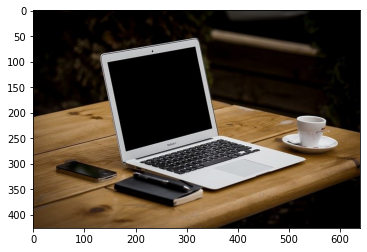

notebook (46.7%)


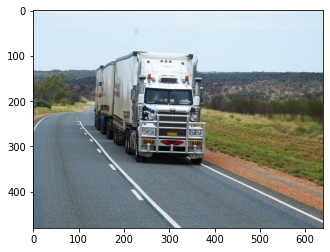

trailer_truck (60.1%)


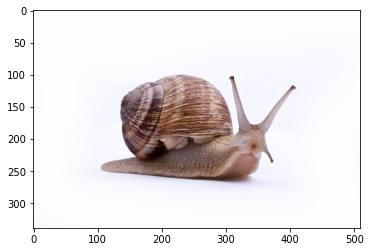

snail (79.5%)


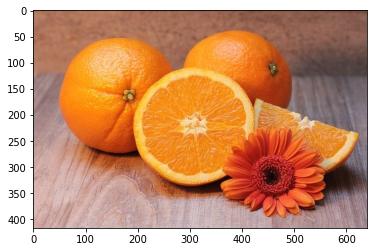

orange (92.9%)


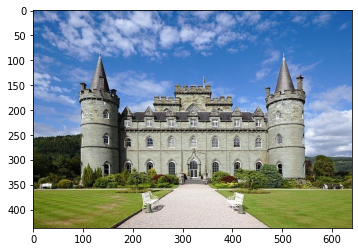

castle (41.8%)


[{'name': 'input_21',
  'index': 0,
  'shape': array([  1, 224, 224,   3]),
  'shape_signature': array([ -1, 224, 224,   3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

[{'name': 'Identity',
  'index': 493,
  'shape': array([   1, 1000]),
  'shape_signature': array([  -1, 1000]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

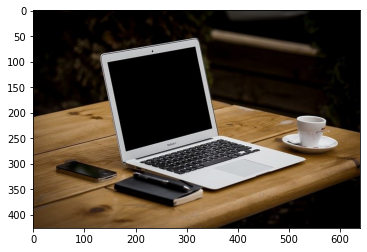

notebook (46.7%)


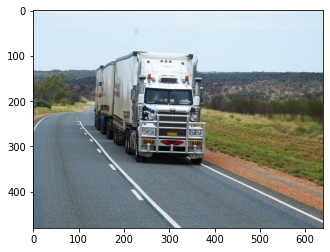

trailer_truck (60.1%)


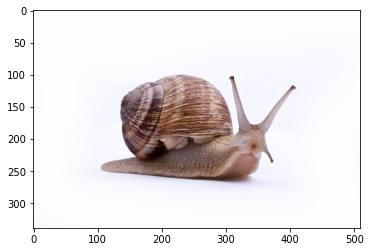

snail (79.5%)


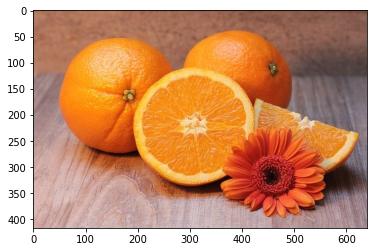

orange (92.9%)


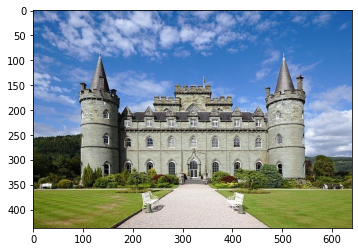

castle (41.8%)


In [80]:
model = tf.keras.applications.EfficientNetB0(weights="imagenet")

compare(model)


In [6]:
tf.__version__

'2.3.0'

tion (__inference_efficientnetb0_layer_call_and_return_conditional_losses_68271) with ops with custom gradients. Will likely fail if a gradient is requested.


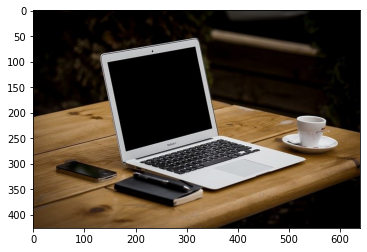

notebook (46.7%)


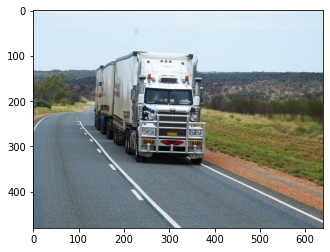

trailer_truck (60.1%)


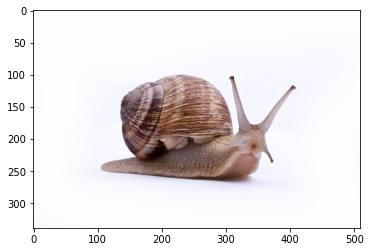

snail (79.5%)


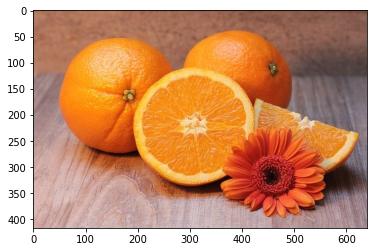

orange (92.9%)


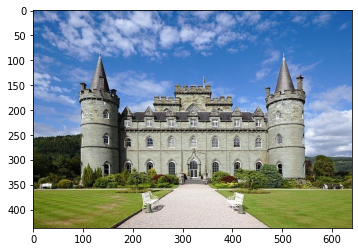

castle (41.8%)


In [73]:
path="./efficientnet/"
model = tf.keras.models.load_model(path)
images, input_data = get_preprocessed_test_image()

y_pred = model.predict(input_data)
topK = 1
y_pred_top = tf.keras.applications.efficientnet.decode_predictions(y_pred, top=topK)
display_output(images, topK, y_pred_top)

[{'name': 'input_1',
  'index': 0,
  'shape': array([  1, 224, 224,   3]),
  'shape_signature': array([ -1, 224, 224,   3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

[{'name': 'Identity',
  'index': 493,
  'shape': array([   1, 1000]),
  'shape_signature': array([  -1, 1000]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

(5, 1000)
[[('n03832673', 'notebook', 0.4668622)], [('n04467665', 'trailer_truck', 0.6009851)], [('n01944390', 'snail', 0.79450065)], [('n07747607', 'orange', 0.9294528)], [('n02980441', 'castle', 0.4181169)]]


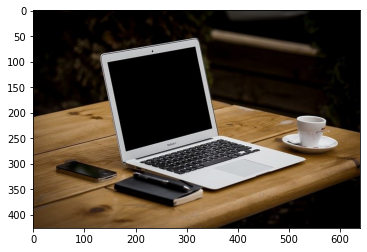

notebook (46.7%)


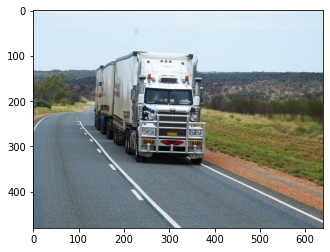

trailer_truck (60.1%)


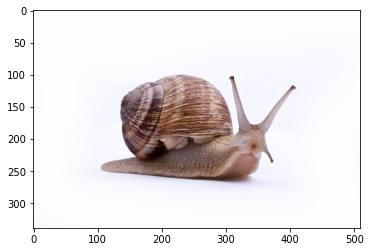

snail (79.5%)


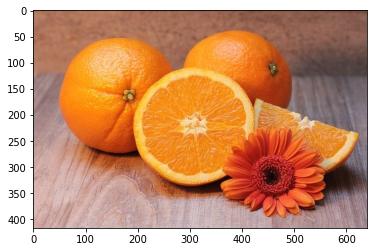

orange (92.9%)


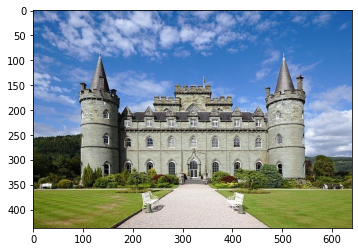

castle (41.8%)


In [76]:

# Load the TFLite model and allocate tensors
path="efficientnet.tflite"
interpreter = tf.lite.Interpreter(path)
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

display(input_details)
display(output_details)

image, input_data = get_preprocessed_test_image()

y_pred = []
for i in range(len(input_data)):
    # Test the model on test image
    input_shape = input_details[0]['shape']
    input_data = np.array(input_data, dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], [input_data[i]])
    interpreter.invoke()
    y_pred.extend(interpreter.get_tensor(output_details[0]['index']))

y_pred = np.array(y_pred)
topK = 1
y_pred_top = tf.keras.applications.efficientnet.decode_predictions(y_pred, top=topK)
display_output(images, topK, y_pred_top)